In [2]:
import numpy as np
from PIL import Image
#Use your own finish_im or import this one
#from mth433 import finish_im
from matplotlib import pyplot as plt

In [3]:
img1 = Image.open('first.jpg')
img2 = Image.open('bluer.jpg')
img3 = Image.open('whiter.jpg')
img4 = Image.open('text.jpg')
img5 = Image.open('face.jpg')

In [4]:
# this computes the singular value decomposition of individual color channels
# so I can avoid repetition in percent_variance
def image_channel_svd(im, channel):
    imarr = np.array(im)
    
    if (channel>=0 and channel<=2):
        color_ch = imarr[:,:,channel]
        U, S, Vh = np.linalg.svd(color_ch)
        return U, S, Vh
    else:
        print("no valid channel")
        return 0

In [5]:
def calc_variance(S, k):
    ssv = S**2
    var_data = []
    total_var = np.sum(ssv)
    cum_sum = np.cumsum(ssv[:k])
    return (cum_sum / total_var) * 100
    

### part 1

In [ ]:
def percent_variance(im, upper_rank):
    """Creates a plot of rank vs. percentage variance.
    On the x-axis are the integers k = 1,2,...,upper_rank.
    On the y-axis are three plots of the percentage variance
    captured by the first k singular values of each of the red, green and blue channels.
    These should be appropriately colored as red, green and blue.
    
    Parameters
    ----------
    im : PIL Image
    upper_rank : int
    
    Returns
    -------
    None
    
    """
    _, S_red, _ = image_channel_svd(img, 0)
    _, S_green, _ = image_channel_svd(img, 1)
    _, S_blue, _ = image_channel_svd(img, 2)
    
    x = np.array(range(1, upper_rank+1))
    y_red = calc_variance(S_red, upper_rank)
    y_green = calc_variance(S_green, upper_rank)
    y_blue = calc_variance(S_blue, upper_rank)
    
    plt.plot(x, y_red, color='r')
    plt.plot(x, y_green, color='g')
    plt.plot(x, y_blue, color='b')    

In [ ]:
_, S_red, _ = image_channel_svd(img1, 0)
_, S_green, _ = image_channel_svd(img1, 1)
_, S_blue, _ = image_channel_svd(img1, 2)
print(S_red)
print(S_green)
print(S_blue)

NameError: name 'im1' is not defined

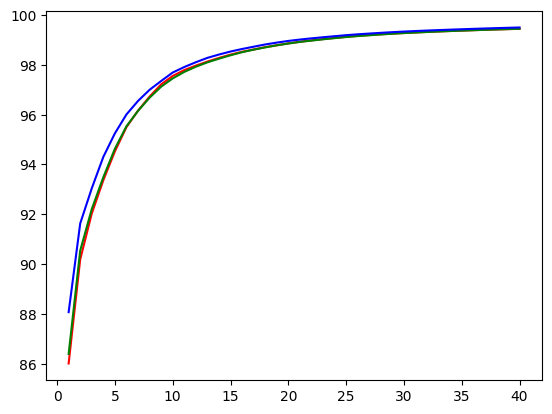

In [35]:
percent_variance(img1, 40)

**note**: do 5 more plots for 5 different other images

### part 2

In [27]:
# helper function for im_approx
# just does basic stuff. avoids repetition
def channel_approx(channel, k):
    U, S, Vt = np.linalg.svd(channel)
    S_split = np.zeros_like(S)
    S_split[:k] = S[:k]
    
    # truncate each component with respect to upper rank specified by parameter, then return result
    reduced_ch = U[:,:k] @ np.diag(S_split[:k]) @ Vt[:k,:]
    reduced_ch = np.clip(reduced_ch, 0, 255).astype(np.uint8)
    return reduced_ch



In [28]:
def im_approx(im, k):
   """Returns the best rank k approximation of an image using
      the svd.  
      
      More specifically, k is a list of 3 integers and im_approx returns
      the best k[0],k[1],k[2] approximations of the red,green,blue
      channels.
   
   Parameters
   ----------
   im : PIL Image 
   k : list of 3 integers (e.g. [25,19,100]). 
   
   Returns
   -------
   PIL Image 
   """
   
   imarr = np.array(im)
   
   # for each color channel
   red_approx = channel_approx(imarr[:,:,0], k)
   green_approx = channel_approx(imarr[:,:,1], k)
   blue_approx = channel_approx(imarr[:,:,2], k)
   
   # initialize reconstruction array
   approximated_image = np.zeros_like(imarr)
   
   # simple substitution of the third dimension containing channels should suffice
   # (for any non-obnoxiously sized image).
   # pretty sure memory allocation issues arise if not
   approximated_image[:,:,0] = red_approx
   approximated_image[:,:,1] = green_approx
   approximated_image[:,:,2] = blue_approx
   
   # return reconstructed image
   return Image.fromarray(np.uint8(approximated_image))
    

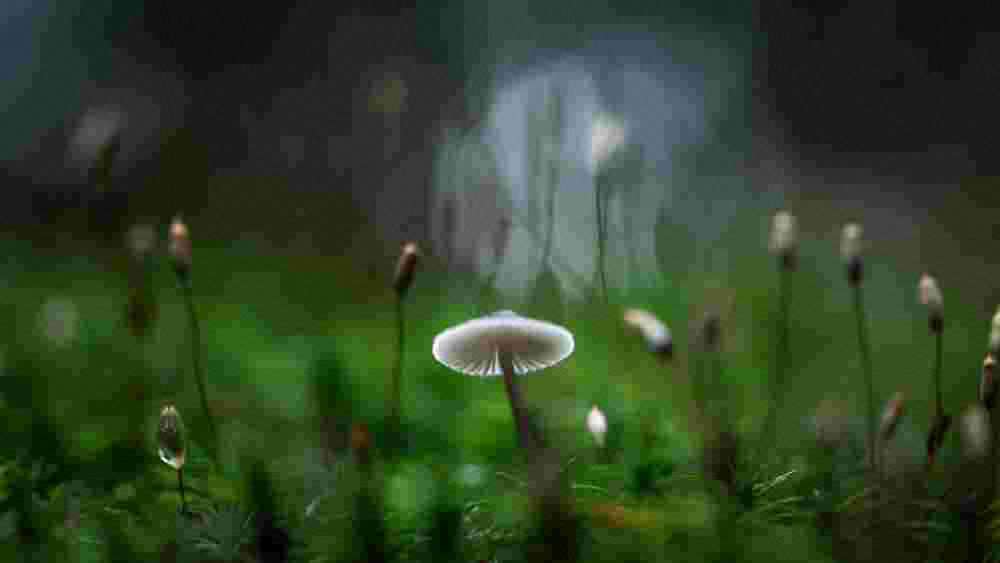

In [30]:
im_approx(image, 100) 
# image could be a bit larger

In [ ]:
def im_reducer(im,percent):
    """Returns the best rank k approximation of an image where k/rank(im) = percent.  
    Calls the function im_approx
    
    Parameters
    ----------
    im : PIL Image
    percent : list of 3 float values in the range [0,1] 
    
    Returns
    -------
    PIL Image
    
    """
    rank_approx = []
    imarr = np.array(im)
    rank = np.min(imarr.shape) # rank is smallest of n, m
    new_image = im_approx(im, np.ceil(percent*rank)) # rounds upper rank up
    return new_image

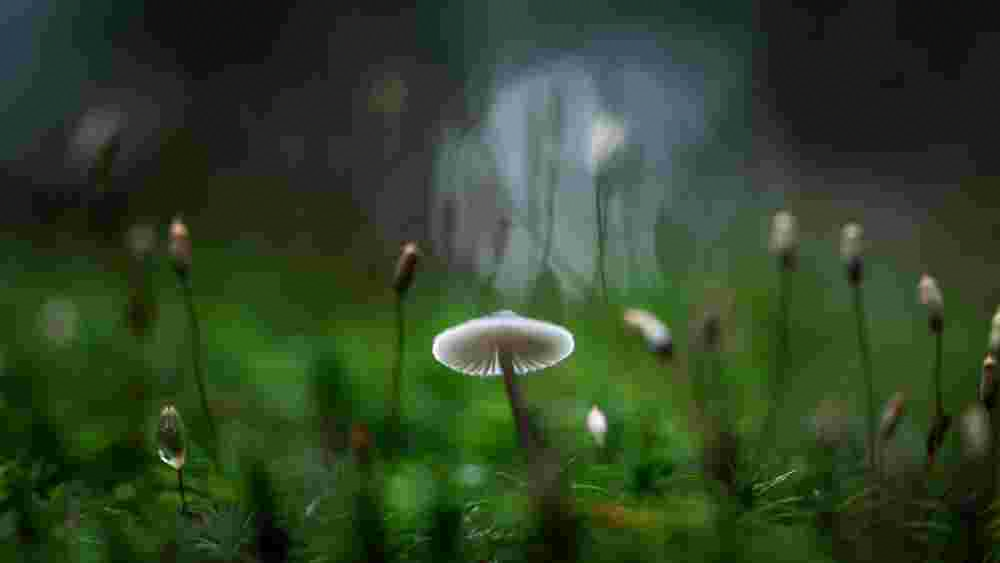

In [32]:
im_reducer(image, 50)

In [ ]:
im_approx(image, 500)